In [727]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,recall_score,classification_report
import keras
import os

# Fix file path issue
df = pd.read_csv(r'c:\Users\samah\Skin_Cancer_DEPI\metadata.xls')


In [728]:
df.head()

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,NaN,NEV,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,PAT_1516_1765_530.png,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,5.0,BCC,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,PAT_46_881_939.png,True
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,...,NaN,ACK,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,PAT_1545_1867_547.png,False
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,...,NaN,ACK,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,PAT_1989_4061_934.png,False
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,...,5.0,BCC,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,PAT_684_1302_588.png,True


# Data Cleaning & Data Preprossing 

In [729]:
df.shape

(2298, 26)

In [730]:
df.columns

Index(['patient_id', 'lesion_id', 'smoke', 'drink', 'background_father',
       'background_mother', 'age', 'pesticide', 'gender',
       'skin_cancer_history', 'cancer_history', 'has_piped_water',
       'has_sewage_system', 'fitspatrick', 'region', 'diameter_1',
       'diameter_2', 'diagnostic', 'itch', 'grew', 'hurt', 'changed', 'bleed',
       'elevation', 'img_id', 'biopsed'],
      dtype='object')

In [731]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2298 entries, 0 to 2297
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patient_id           2298 non-null   object 
 1   lesion_id            2298 non-null   int64  
 2   smoke                1494 non-null   object 
 3   drink                1494 non-null   object 
 4   background_father    1480 non-null   object 
 5   background_mother    1476 non-null   object 
 6   age                  2298 non-null   int64  
 7   pesticide            1494 non-null   object 
 8   gender               1494 non-null   object 
 9   skin_cancer_history  1494 non-null   object 
 10  cancer_history       1494 non-null   object 
 11  has_piped_water      1494 non-null   object 
 12  has_sewage_system    1494 non-null   object 
 13  fitspatrick          1494 non-null   float64
 14  region               2298 non-null   object 
 15  diameter_1           1494 non-null   f

In [732]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
lesion_id,2298.0,1529.933856,1196.285644,6.0,720.5,1297.0,1782.75,4820.0
age,2298.0,60.464752,15.894866,6.0,52.0,62.0,72.00,94.0
fitspatrick,1494.0,2.265730,0.729029,1.0,2.0,2.0,3.00,6.0
diameter_1,1494.0,11.897055,8.634492,0.0,7.0,10.0,15.00,100.0
diameter_2,1494.0,8.852209,5.797036,0.0,5.0,8.0,10.00,70.0


In [733]:
df.isnull().sum()

patient_id               0
lesion_id                0
smoke                  804
drink                  804
background_father      818
background_mother      822
age                      0
pesticide              804
gender                 804
skin_cancer_history    804
cancer_history         804
has_piped_water        804
has_sewage_system      804
fitspatrick            804
region                   0
diameter_1             804
diameter_2             804
diagnostic               0
itch                     0
grew                     0
hurt                     0
changed                  0
bleed                    0
elevation                0
img_id                   0
biopsed                  0
dtype: int64

In [767]:
df.dropna(inplace=True)

In [768]:
# Encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(df['diagnostic'])

In [769]:
df

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
1,PAT_46,881,0.0,0.0,9,7,55,0.0,0.0,1.0,...,5.0,1,1,1,0,1,1,1,1254,1
4,PAT_684,1302,0.0,1.0,9,7,79,0.0,1.0,1.0,...,5.0,1,1,1,0,0,1,1,1493,1
6,PAT_778,1471,0.0,1.0,4,3,52,0.0,0.0,0.0,...,10.0,1,0,1,0,1,1,1,1606,1
7,PAT_117,179,0.0,0.0,9,7,74,1.0,0.0,0.0,...,10.0,1,1,1,1,0,1,1,134,1
9,PAT_705,4015,0.0,1.0,4,2,58,1.0,0.0,1.0,...,7.0,0,0,1,0,0,0,0,1521,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2282,PAT_136,203,0.0,0.0,12,10,60,0.0,0.0,0.0,...,5.0,1,0,0,0,0,0,1,277,1
2291,PAT_273,421,0.0,0.0,9,7,41,1.0,1.0,0.0,...,5.0,1,1,0,1,0,1,1,1000,1
2292,PAT_491,934,0.0,0.0,9,7,43,1.0,0.0,1.0,...,5.0,4,1,0,0,0,1,1,1278,1
2294,PAT_46,880,0.0,0.0,9,7,55,0.0,0.0,1.0,...,11.0,1,1,1,0,1,0,0,1251,1


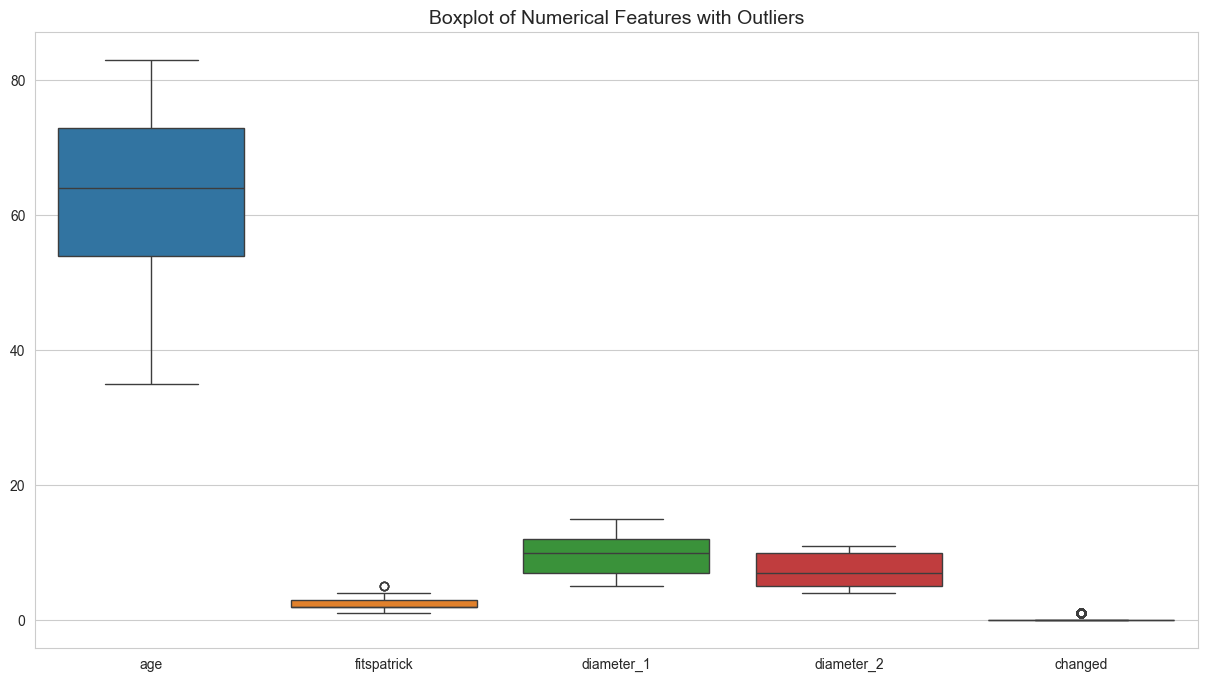

In [770]:
plt.figure(figsize=(15, 8))


sns.boxplot(data=df[['age', 'fitspatrick', 'diameter_1', 'diameter_2', 'changed']])

plt.title("Boxplot of Numerical Features with Outliers", fontsize=14)
plt.xticks(rotation=0)
plt.show()

In [771]:
for col in ['age', 'diameter_1', 'diameter_2']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [772]:
for col in ['age', 'diameter_1', 'diameter_2']:
    df[col] = np.clip(df[col], df[col].quantile(0.05), df[col].quantile(0.95))

In [773]:
df.sample(10)

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
2048,PAT_710,1330,0.0,0.0,11,0,53.0,1.0,0.0,1.0,...,9.0,2,0,0,0,0,0,0,1526,1
1241,PAT_316,674,0.0,0.0,4,2,79.0,0.0,0.0,1.0,...,8.0,1,1,1,1,0,0,1,1054,1
470,PAT_304,4186,0.0,0.0,2,2,81.0,0.0,1.0,0.0,...,8.0,0,0,0,0,0,0,0,1034,0
113,PAT_181,833,0.0,0.0,13,11,59.0,0.0,1.0,1.0,...,10.0,0,1,0,0,0,0,0,699,0
1096,PAT_637,1434,1.0,1.0,2,0,69.0,0.0,1.0,0.0,...,7.0,4,0,0,0,0,0,1,1429,1
793,PAT_198,302,0.0,0.0,4,2,53.0,0.0,0.0,1.0,...,7.0,1,1,1,0,0,0,0,799,1
2222,PAT_359,741,0.0,0.0,6,3,53.0,0.0,0.0,1.0,...,5.0,4,1,1,0,0,1,1,1113,1
2248,PAT_90,138,0.0,0.0,9,7,73.0,0.0,0.0,0.0,...,6.0,1,1,1,1,0,1,0,1758,1
1969,PAT_84,128,0.0,0.0,9,7,69.0,0.0,0.0,0.0,...,7.0,1,1,1,1,0,1,1,1687,1
1106,PAT_309,663,0.0,0.0,12,2,83.0,0.0,0.0,1.0,...,7.0,0,1,0,1,0,1,1,1044,1


## EDA VISUALIZATION

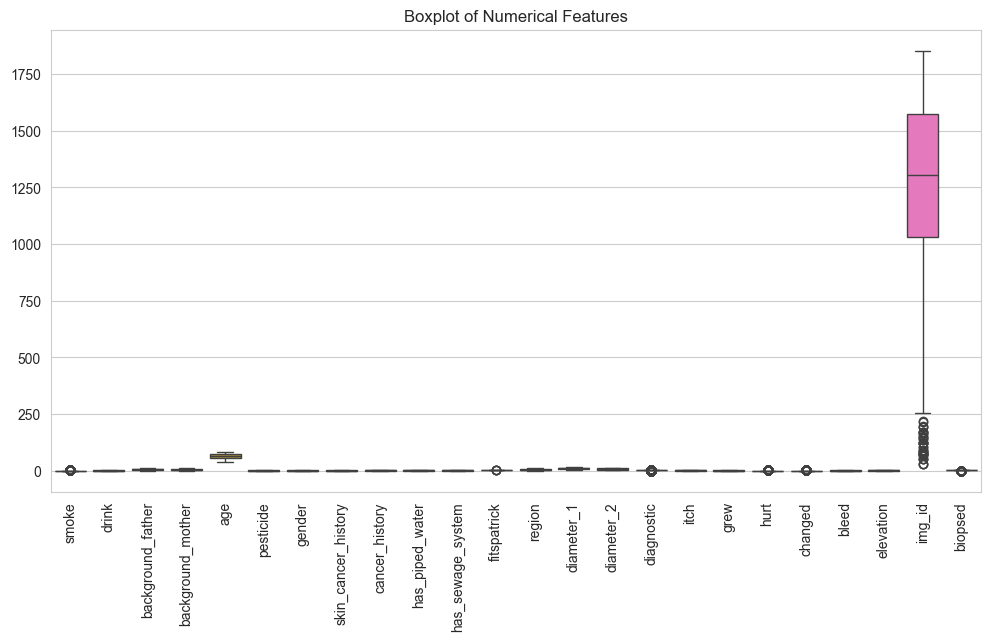

In [774]:
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns = numerical_columns.drop('lesion_id')  
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns])
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Features")
plt.show()
# كود لوغارتمي استخدمته عشان لو فيه فروق كبيره ما بين القيم وعشان يوضح الرسمه اكتر

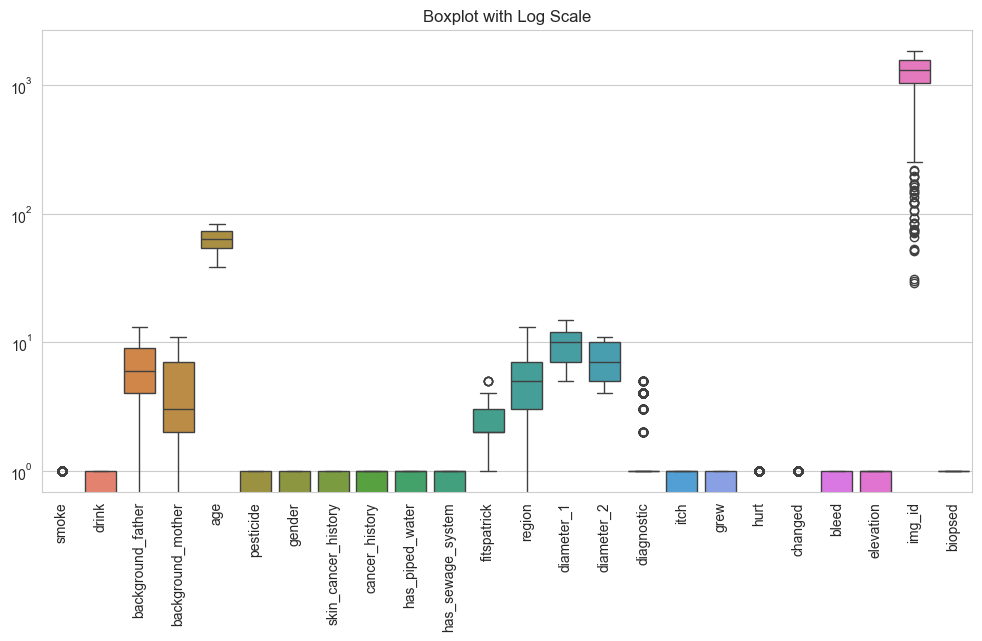

In [775]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns])
plt.yscale("log") 
plt.xticks(rotation=90)
plt.title("Boxplot with Log Scale")
plt.show()

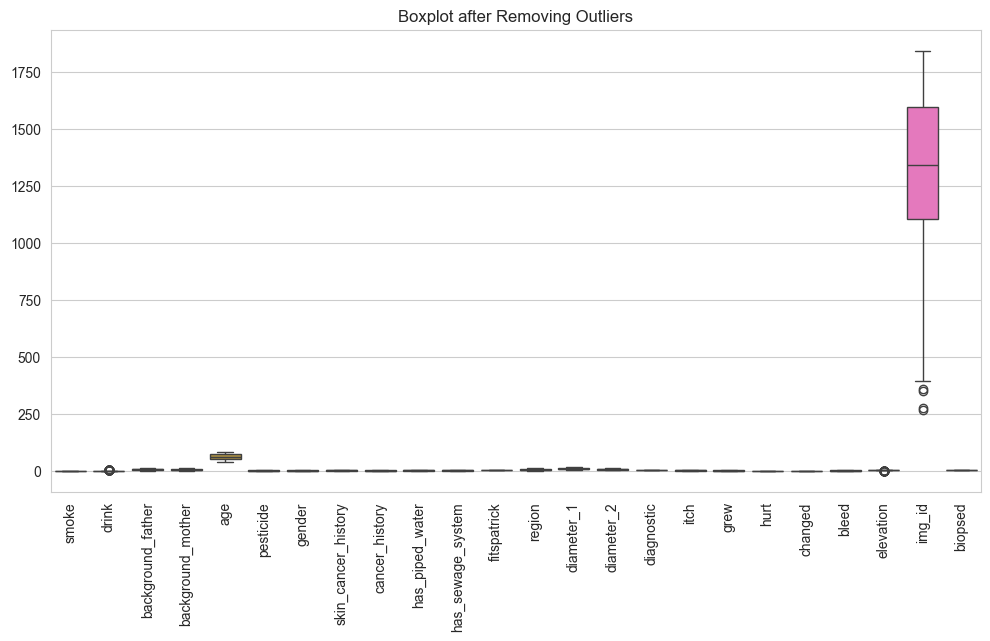

In [776]:
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
#الكود دا انا عملته عشان يشيل الداتا الي ملهاش لازمه الي ممكن تاثر علي الرسم
df_filtered = df[~((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered[numerical_columns])
plt.xticks(rotation=90)
plt.title("Boxplot after Removing Outliers")
plt.show()

In [777]:
df.isnull().sum()

#كله صفر كدا مفيش اي missing data

patient_id             0
lesion_id              0
smoke                  0
drink                  0
background_father      0
background_mother      0
age                    0
pesticide              0
gender                 0
skin_cancer_history    0
cancer_history         0
has_piped_water        0
has_sewage_system      0
fitspatrick            0
region                 0
diameter_1             0
diameter_2             0
diagnostic             0
itch                   0
grew                   0
hurt                   0
changed                0
bleed                  0
elevation              0
img_id                 0
biopsed                0
dtype: int64

In [778]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1085 entries, 1 to 2296
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patient_id           1085 non-null   object 
 1   lesion_id            1085 non-null   int64  
 2   smoke                1085 non-null   float64
 3   drink                1085 non-null   float64
 4   background_father    1085 non-null   int64  
 5   background_mother    1085 non-null   int64  
 6   age                  1085 non-null   float64
 7   pesticide            1085 non-null   float64
 8   gender               1085 non-null   float64
 9   skin_cancer_history  1085 non-null   float64
 10  cancer_history       1085 non-null   float64
 11  has_piped_water      1085 non-null   float64
 12  has_sewage_system    1085 non-null   float64
 13  fitspatrick          1085 non-null   float64
 14  region               1085 non-null   int64  
 15  diameter_1           1085 non-null   float6

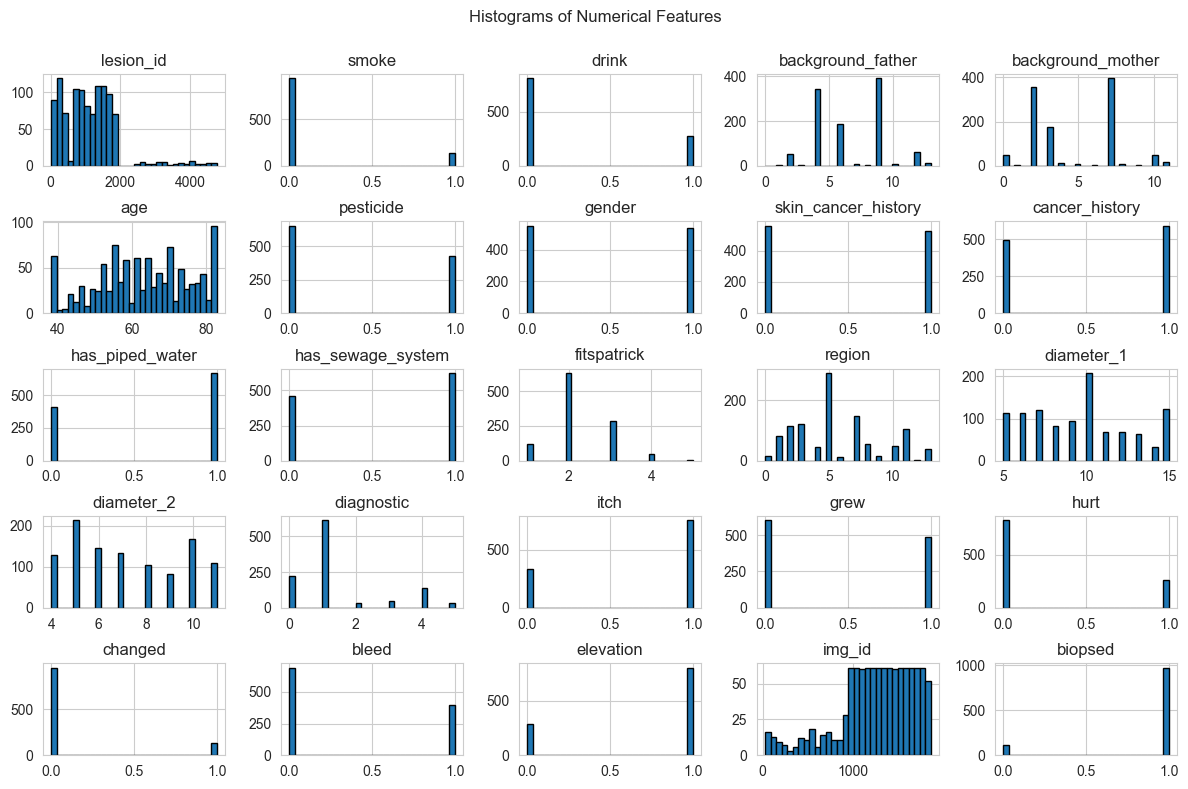

In [779]:

df.hist(figsize=(12, 8), bins=30,edgecolor='black')
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust the top margin to make space for the title

plt.suptitle("Histograms of Numerical Features")
plt.show()

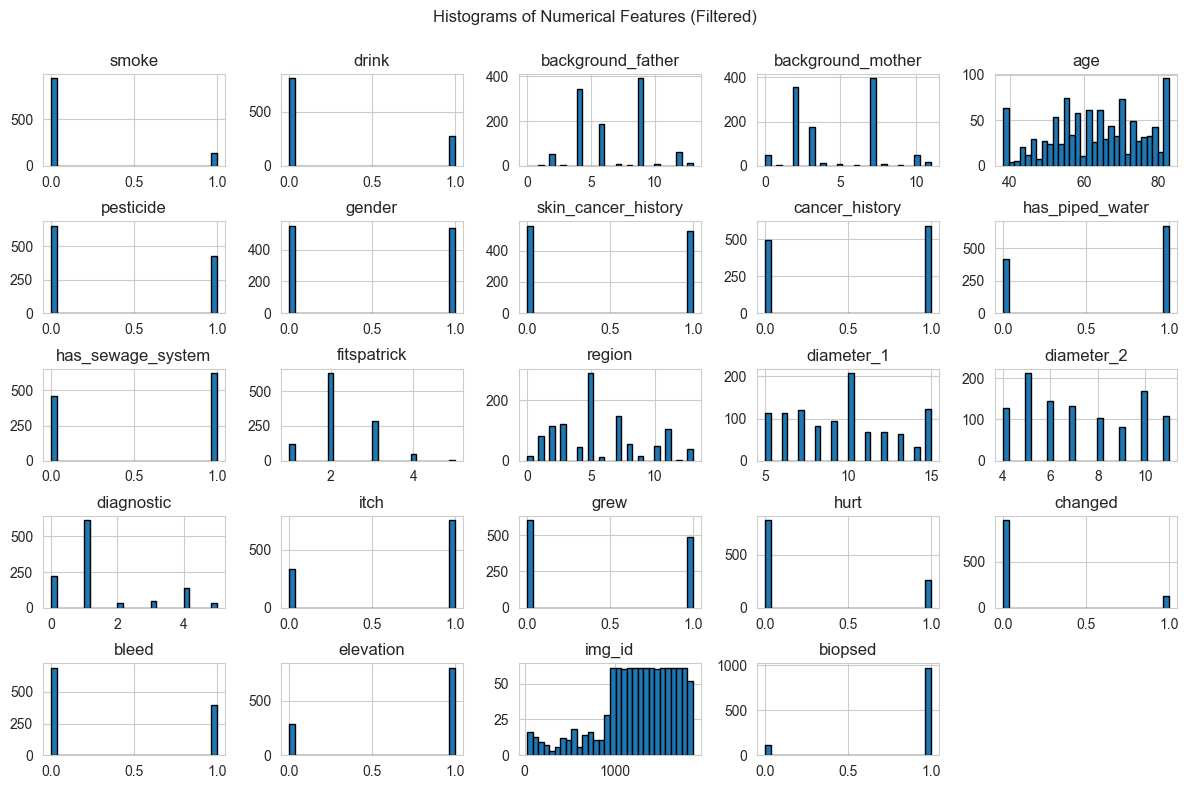

In [780]:
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns = [col for col in numerical_columns if col not in ['patient_id', 'lesion_id']]
df[numerical_columns].hist(figsize=(12,8), bins=30, edgecolor='black')
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust the top margin to make space for the title
plt.suptitle("Histograms of Numerical Features (Filtered)")
plt.show()
#دا احسن شويه عشان شلت patient id & lesion id ملهومش لازمه غي الديجرام

In [781]:
df[numerical_columns].describe()

,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
count,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,...,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000
mean,0.131797,0.257143,6.700461,4.523502,63.301382,0.396313,0.493088,0.484793,0.545622,0.618433,...,7.235023,1.425806,0.694009,0.447005,0.241475,0.123502,0.364977,0.738249,1251.226728,0.895853
std,0.338426,0.437260,2.793583,2.801332,12.619234,0.489357,0.500183,0.499999,0.498144,0.485995,...,2.310546,1.374946,0.461038,0.497413,0.428175,0.329165,0.481646,0.439791,414.561993,0.305593
min,0.000000,0.000000,0.000000,0.000000,38.200000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000
25%,0.000000,0.000000,4.000000,2.000000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1032.000000,1.000000
50%,0.000000,0.000000,6.000000,3.000000,64.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,7.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1303.000000,1.000000
75%,0.000000,1.000000,9.000000,7.000000,73.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,10.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1574.000000,1.000000
max,1.000000,1.000000,13.000000,11.000000,83.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,11.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1854.000000,1.000000


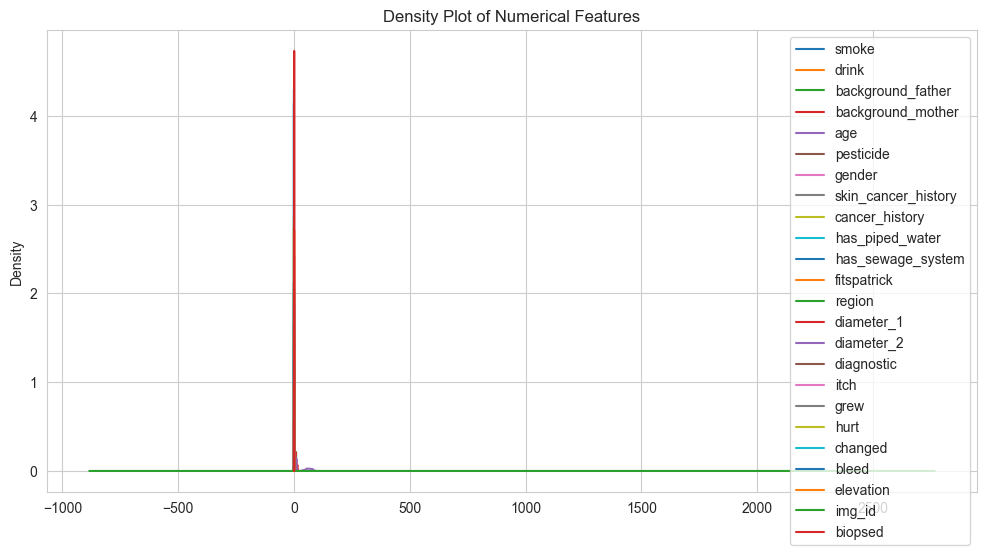

In [782]:
df[numerical_columns].plot(kind='kde', figsize=(12,6))
plt.title("Density Plot of Numerical Features")
plt.show()

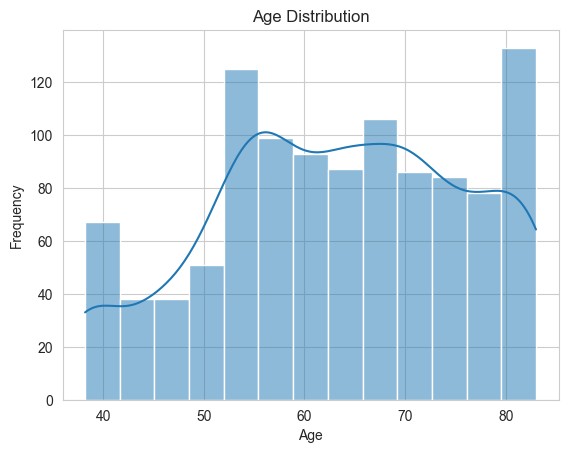

In [783]:
sns.histplot(df['age'], kde=True)  # Age distribution
plt.title("Age Distribution")
plt.xlabel("Age") 
plt.ylabel("Frequency")
plt.show()


ValueError: The palette dictionary is missing keys: {'0.0', '1.0'}

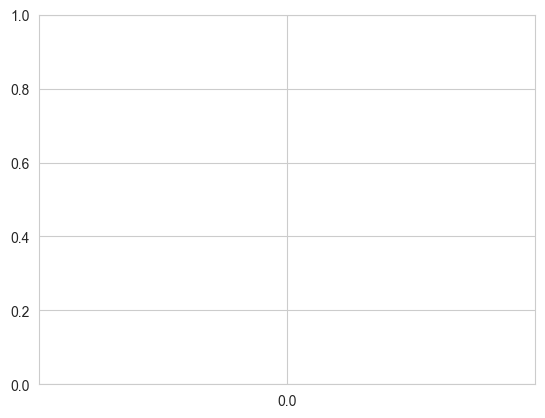

In [784]:

sns.countplot(x='gender', data=df, palette={'FEMALE': 'pink', 'MALE': 'blue'})
plt.title("Gender Distribution")
plt.show()

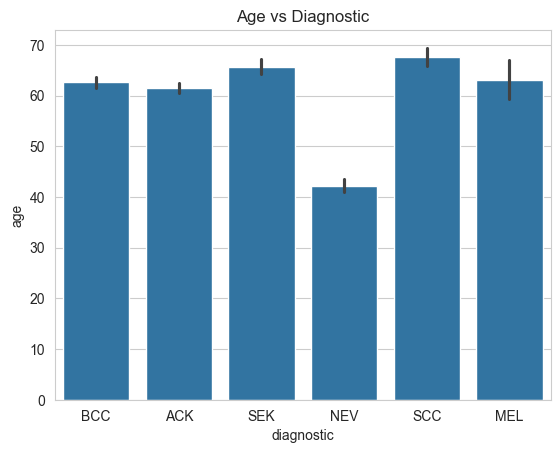

In [ ]:
sns.barplot(x='diagnostic', y='age', data=df)
plt.title("Age vs Diagnostic")
plt.show()

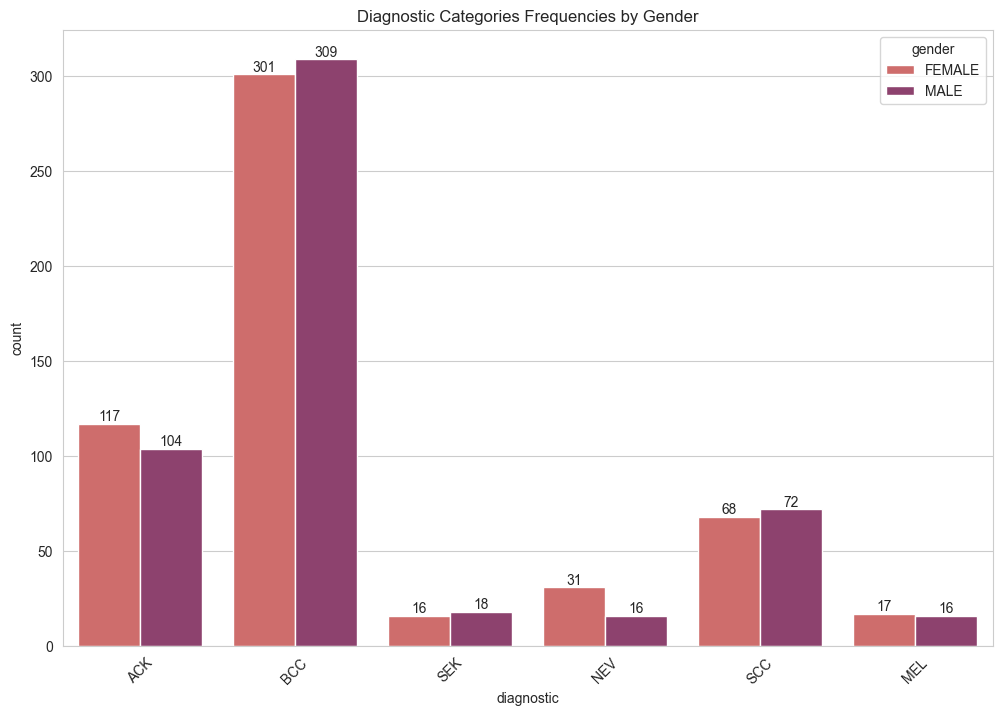

In [ ]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x='diagnostic', hue='gender', data=df, order=df['diagnostic'].value_counts().index, palette='flare')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Diagnostic Categories Frequencies by Gender')
plt.xticks(rotation=45)
plt.show()

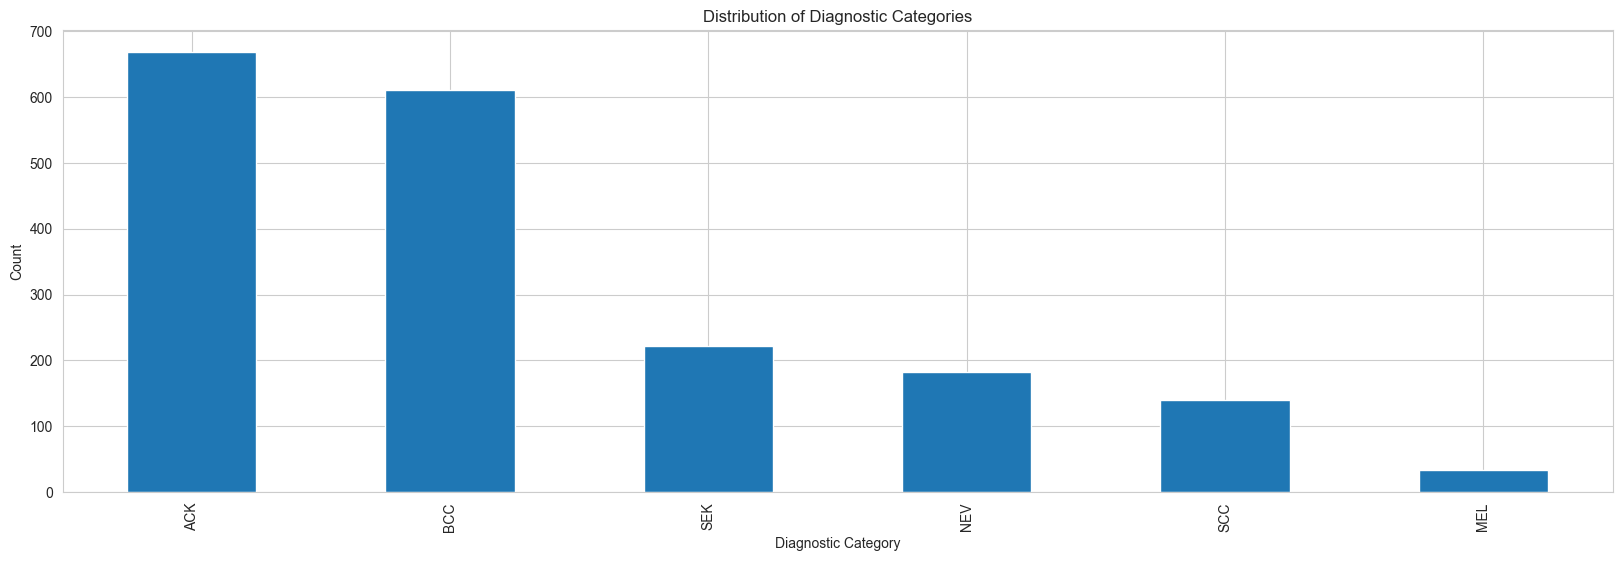

In [ ]:

plt.figure(figsize=(20,6))
df['diagnostic'].value_counts().plot(kind='bar')
plt.title("Distribution of Diagnostic Categories")
plt.xlabel("Diagnostic Category")
plt.ylabel("Count")
plt.show()

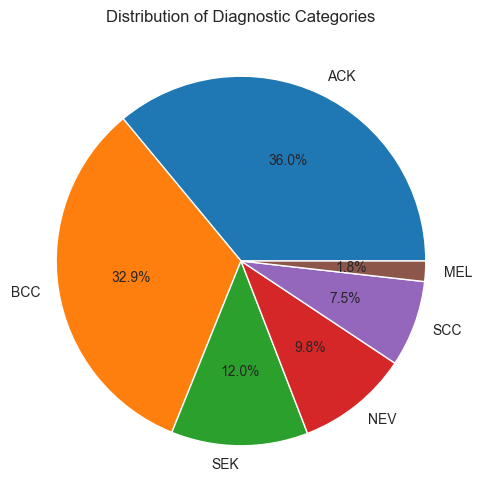

In [ ]:
plt.figure(figsize=(20,6))
df['diagnostic'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("Distribution of Diagnostic Categories")
plt.ylabel("")
plt.show()


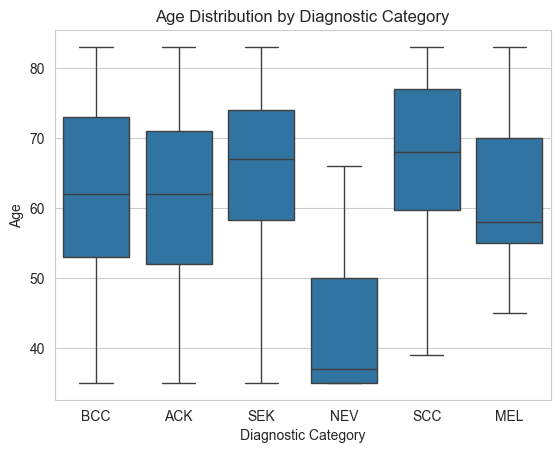

In [ ]:
sns.boxplot(x='diagnostic', y='age', data=df)  # Age per class
plt.title("Age Distribution by Diagnostic Category")
plt.xlabel("Diagnostic Category")
plt.ylabel("Age")
plt.show()


# Preprocessing 

In [ ]:
#check if the target variable (diagnostic) is imbalanced
df['diagnostic'].value_counts(normalize=True) * 100

diagnostic
ACK    36.010782
BCC    32.884097
SEK    11.967655
NEV     9.811321
SCC     7.547170
MEL     1.778976
Name: proportion, dtype: float64

In [ ]:
#Encoder my target 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['diagnostic'] = le.fit_transform(df['diagnostic'])
df['background_father']= le.fit_transform(df['background_father'])
df['background_mother']= le.fit_transform(df['background_mother'])
df['region']= le.fit_transform(df['region'])
df['img_id']=le.fit_transform(df['img_id'])
df['biopsed']=le.fit_transform(df['biopsed'])


In [ ]:
df = df.replace({True: 1, False: 0, 'TRUE': 1, 'FALSE': 0, 'UNK':0})

In [ ]:
df['gender'] = df['gender'].replace({'MALE': 1, 'FEMALE': 0})


In [ ]:
ml_drop_cols = ['patient_id', 'lesion_id',] 

# Create separate datasets for ML and DL
ml_df = df.drop(columns=[col for col in ml_drop_cols if col in df.columns])
dl_df = df.copy()  # Retain all columns for Deep Learning

In [ ]:
X = ml_df.drop(columns=['diagnostic'])  
y = ml_df['diagnostic']  

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=60)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
X_scaled = scaler.fit_transform(X)

In [ ]:
#Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)


ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# Machine Learning 

In [ ]:

model1 = xgb.XGBClassifier()
model1.fit(x_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred=model1.predict(x_test)

In [ ]:
print("XGBoost F1 Score (macro):{:.2%}".format( f1_score(y_test, y_pred, average='macro')))
print("XGBoost Accuracy Score: {:.2%}".format(accuracy_score(y_test, y_pred)))
print("XGBoost Recall Score (macro):{:.2%}".format(recall_score(y_test, y_pred, average='macro')))


XGBoost F1 Score (macro):66.61%
XGBoost Accuracy Score: 76.83%
XGBoost Recall Score (macro):62.17%


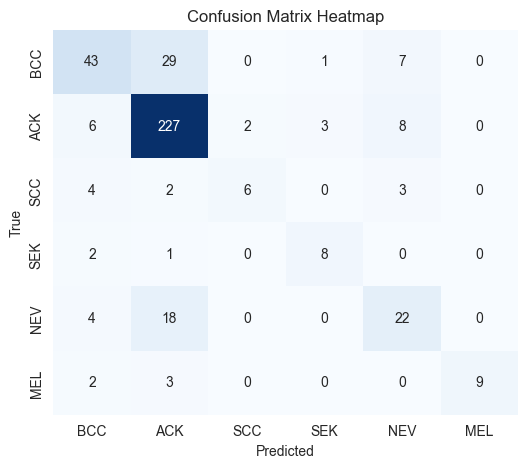

In [ ]:
# Ensure the confusion matrix uses the correct dimensions
cm = confusion_matrix(y_test[:len(y_pred)], y_pred)

# Create the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=["BCC","ACK","SCC","SEK","NEV","MEL"],yticklabels=["BCC","ACK","SCC","SEK","NEV","MEL"])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [ ]:
model2=RandomForestClassifier()
model2.fit(x_train, y_train)


RandomForestClassifier()

In [ ]:
y_pred2=model2.predict(x_test)

In [ ]:
print("Random Forest F1 Score (macro):{:.2%}".format( f1_score(y_test, y_pred2, average='macro')))
print("Random Forest Accuracy Score: {:.2%}".format(accuracy_score(y_test, y_pred2)))
print("Random Forest Recall Score (macro):{:.2%}".format(recall_score(y_test, y_pred2, average='macro')))


Random Forest F1 Score (macro):67.86%
Random Forest Accuracy Score: 78.05%
Random Forest Recall Score (macro):58.48%


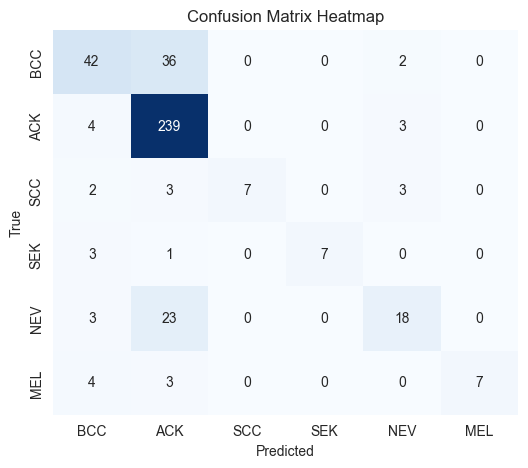

In [ ]:
cm = confusion_matrix(y_test, y_pred2)

# Create the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=["BCC","ACK","SCC","SEK","NEV","MEL"],yticklabels=["BCC","ACK","SCC","SEK","NEV","MEL"])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')

plt.show()

In [ ]:
# Ensure the predictions and true labels have the same length
if len(y_pred) > len(y_test):
	y_pred = y_pred[:len(y_test)]
elif len(y_pred) < len(y_test):
	y_test = y_test[:len(y_pred)]

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.54      0.61        80
           1       0.81      0.92      0.86       246
           2       0.75      0.40      0.52        15
           3       0.67      0.73      0.70        11
           4       0.55      0.50      0.52        44
           5       1.00      0.64      0.78        14

    accuracy                           0.77       410
   macro avg       0.75      0.62      0.67       410
weighted avg       0.76      0.77      0.76       410



In [ ]:
def get_scores(model, name):
    preds = model.predict(x_test)  # Use x_test instead of X_test_scaled
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, preds),
        "F1 Macro": f1_score(y_test, preds, average='macro'),
        "Recall Macro": recall_score(y_test, preds, average='macro')
    }

results = pd.DataFrame([
    get_scores(model2, "Random Forest"),
    get_scores(model1, "XGBoost"),
    get_scores(model1, "Tuned XGBoost")
])
print(results)

           Model  Accuracy  F1 Macro  Recall Macro
0  Random Forest  0.780488  0.678551      0.584778
1        XGBoost  0.768293  0.666143      0.621732
2  Tuned XGBoost  0.768293  0.666143      0.621732
